# Spotify Exploratory Data Analysis using Python

__By: Matthew Abruzzese Ott__

# Introduction

Spotify is a proprietary Swedish audio streaming and media services provider founded on April 23, 2006 by Daniel Ek and Martin Lorentzon. It is one of the largest music streaming service providers, with over 456 million monthly active users, including 195 million paying subscribers, as of September 2022.

In this project we will be exploring and quantifying data about music from Spotify, and drawing valuable insights.

This includes performing exploratory data analysis (EDA) and creating data visualizations using data scraped from Spotify.

This project will be done in Python, utilizing multiple packages including NumPy, Pandas, Matplotlib, and Seaborn.

__Download Spotify datasets from Kaggle:__

https://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets?select=tracks.csv

https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db?select=SpotifyFeatures.csv

# Import libraries for data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the Spotify datasets

In [2]:
df_tracks = pd.read_csv('/Users/mattabruzzeseott/Documents/Portfolio Projects/Jupyter/tracks.csv')
df_genres = pd.read_csv('/Users/mattabruzzeseott/Documents/Portfolio Projects/Jupyter/SpotifyFeatures.csv')

# Spotify Tracks Dataset Analysis

__Preview the Dataset__

In [3]:
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


__Check for any null values present in the dataset.__

In [4]:
pd.isnull(df_tracks).sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

It can be seen that the song name column has 71 null values.

In [5]:
pd.isnull(df_tracks).sum().sum()

71

In [6]:
len(df_tracks)

586672

There are just 71 missing values in the entire dataset consisting of ~586k rows. Therefore the dataset is good, and our conclusions will be valid.

__Inspect and identify the number of rows and columns in the dataset, and check the data type for each variable.__

In [7]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

__Descriptive statistics for numerical values in the dataset.__

In [8]:
df_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


__Identify the ten least popular songs in the dataset.__

To obtain a list of the ten least popular songs, we will sort the "popularity" column in ascending order.

In [9]:
sorted_df = df_tracks.sort_values('popularity', ascending = True).head(10)
sorted_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
546130,181rTRhCcggZPwP2TUcVqm,"Newspaper Reports On Abner, 20 February 1935",0,896575,0,"['Norris Goff', 'Chester Lauck', 'Carlton Bric...","['3WCwCPDMpGzrt0Qz6quumy', '7vk8UqABg0Sga78GI3...",1935-02-20,0.595,0.262,8,-17.746,1,0.9320,0.993,0.007510,0.0991,0.320,79.849,4
546222,0yOCz3V5KMm8l1T8EFc60i,恋は水の上で,0,188440,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.418,0.388,0,-8.580,1,0.0358,0.925,0.000014,0.1050,0.439,94.549,4
546221,0y48Hhwe52099UqYjegRCO,私の誕生日,0,173467,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.642,0.178,5,-11.700,1,0.0501,0.993,0.000943,0.0928,0.715,119.013,4
546220,0xCmgtf9ka07hkZg3D6PaV,エル・チョクロ (EL CHOCLO),0,205280,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.695,0.467,0,-12.236,0,0.0422,0.827,0.000000,0.0861,0.756,125.941,4
546219,0tBXS3VuCPX7KWUFH2nros,恋は不思議なもの,0,185733,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.389,0.388,2,-8.221,1,0.0351,0.869,0.000000,0.0924,0.372,72.800,4
546218,0qrKnQtYDVJhKFAXTHYVS9,ゆうべはどうしたの (WHATSA MALLA U),0,183427,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.631,0.249,5,-11.883,1,0.0355,0.951,0.000000,0.0814,0.517,131.097,4
546217,0nqsDxOeKSwEzp3AUQAAqS,"Screen Director's Playhouse, Music For Million...",0,1767071,0,"['Wilms Herbert', 'June Allyson', 'Joseph Kear...","['2rbm8QWvmnVwxFo84EVM1h', '4yW5adMgyIfHFzaL9i...",1949-04-10,0.533,0.317,7,-13.047,1,0.9180,0.682,0.000000,0.3330,0.336,76.836,4
546216,0kGEdsxVLYjCdfxM9tbezd,ブルーマンボ,0,162147,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.529,0.546,0,-6.462,0,0.0418,0.784,0.000000,0.3750,0.903,128.604,4
546215,0bc3PUZurUUXrY7yqoOxjq,"Screen Director's Playhouse, Trade Winds direc...",0,1776652,0,"['Wally Maher', 'Tay Garnett', 'Lurene Tuttle'...","['7hkhJTTI3VnUGVWUt8SJXT', '3kYeeIpRCgJz4fQYDv...",1949-05-19,0.599,0.321,0,-15.428,0,0.9330,0.808,0.000000,0.5570,0.379,93.025,4
546214,0Wwm0ruSjYMIiWG0nyAI1F,"Screen Director's Playhouse, It's A Wonderful ...",0,1767576,0,"['Joseph Granby', 'Jimmy Stewart', 'Irene Tedr...","['6GK59BC4LJzqR0OpHAX2S3', '58BzBaExrnrx898sby...",1949-05-08,0.645,0.341,8,-12.177,1,0.8670,0.690,0.000000,0.1530,0.431,117.591,4


__Identify the ten most popular songs in the dataset with "popularity" greater than 90.__

In [10]:
most_popular = df_tracks.query('popularity > 90', inplace = False).sort_values('popularity', ascending = False)
most_popular[:10]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
91866,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],2019-11-07,0.749,0.463,11,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3


__Make the "release_date" column the new index column.__

In [11]:
df_tracks.set_index('release_date', inplace = True)
df_tracks.index = pd.to_datetime(df_tracks.index)
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


__Find the name of the artist in the 17th row of the dataset.__

We can filter any specific information from the dataset using the index location method iloc[].

In [12]:
df_tracks[['artists']].iloc[17]

artists    ['Fernando Pessoa']
Name: 1922-06-01 00:00:00, dtype: object

__Querying and sorting examples.__

Example 1: Inspect the ten most popular songs in the updated dataset (new index).

In [13]:
most_popular = df_tracks.query('popularity > 90', inplace = False).sort_values('popularity', ascending = False)
most_popular[:10]

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
2021-03-19,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
2021-01-08,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
2021-01-06,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
2020-03-20,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
2020-12-04,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
2020-03-20,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
2021-03-05,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
2020-09-16,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
2019-11-07,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],0.749,0.463,11,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4


Example 2: Sort the most popular songs by release date, and include only specific columns.

In [14]:
pop_date = most_popular.sort_values('release_date', ascending = False)
pop_date[['name', 'artists', 'popularity', 'explicit']][:10]

,name,artists,popularity,explicit
release_date,,,,
2021-03-19,Peaches (feat. Daniel Caesar & Giveon),"['Justin Bieber', 'Daniel Caesar', 'Giveon']",100,1
2021-03-05,Leave The Door Open,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",96,0
2021-03-05,What’s Next,['Drake'],91,1
2021-03-05,Hold On,['Justin Bieber'],92,0
2021-02-11,We're Good,['Dua Lipa'],91,0
2021-02-05,911,['Sech'],91,1
2021-02-05,Up,['Cardi B'],92,1
2021-02-04,Fiel,"['Los Legendarios', 'Wisin', 'Jhay Cortez']",94,0
2021-02-03,Ella No Es Tuya - Remix,"['Rochy RD', 'Myke Towers', 'Nicki Nicole']",92,0


Example 3: Sort the top ten non-explicit songs with "popularity" greater than 85.

In [15]:
most_pop_non_ex = df_tracks.query('(popularity > 85) and (explicit == 0)').sort_values('popularity', 
                  ascending = False)
most_pop_non_ex[:10]

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
2021-01-06,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
2020-12-04,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
2021-03-05,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
2020-03-20,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
2020-09-16,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
2021-02-04,7Bk0uXKk1uPT0XuQbpFzvs,Fiel,94,261667,0,"['Los Legendarios', 'Wisin', 'Jhay Cortez']","['0n6sKrG0xKAf8xmdqeNGke', '3E6xrwgnVfYCrCs0eP...",0.849,0.701,6,-4.407,0,0.0600,0.40700,0.000000,0.1120,0.505,98.005,4
2021-01-15,4cG7HUWYHBV6R6tHn1gxrl,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,94,169153,0,"['Riton', 'Nightcrawlers', 'Mufasa & Hypeman',...","['7i9j813KFoSBMldGqlh2Z1', '1gALaWbNDnwS2ECV09...",0.824,0.862,2,-3.424,1,0.1260,0.00760,0.000132,0.3030,0.801,122.980,4
2020-12-10,1xK1Gg9SxG8fy2Ya373oqb,Bandido,94,232853,0,"['Myke Towers', 'Juhn']","['7iK8PXO48WeuP03g8YR51W', '2LmcxBak1alK1bf7d1...",0.713,0.617,8,-4.637,1,0.0887,0.12200,0.000000,0.0962,0.682,168.021,4
2020-03-27,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3


__Convert the song duration column in the Tracks dataframe from Milliseconds to Seconds.__

In [16]:
df_tracks['duration'] = df_tracks['duration_ms'].apply(lambda x: round(x/1000))
df_tracks.drop('duration_ms', inplace = True, axis = 1)
df_tracks.duration.head()

release_date
1922-02-22    127
1922-06-01     98
1922-03-21    182
1922-03-21    177
1922-01-01    163
Name: duration, dtype: int64

# Data Visualizations

__Correlation Heatmap between Variables using Pearson Correlation__

We will drop three unwanted variables, key, mode, and explicit. We will set the figure size of the correlation map to (14,6), and use the heatmap() function to create the correlation map. Setting the "annotation = True" parameter will place the data value in each cell on the map.

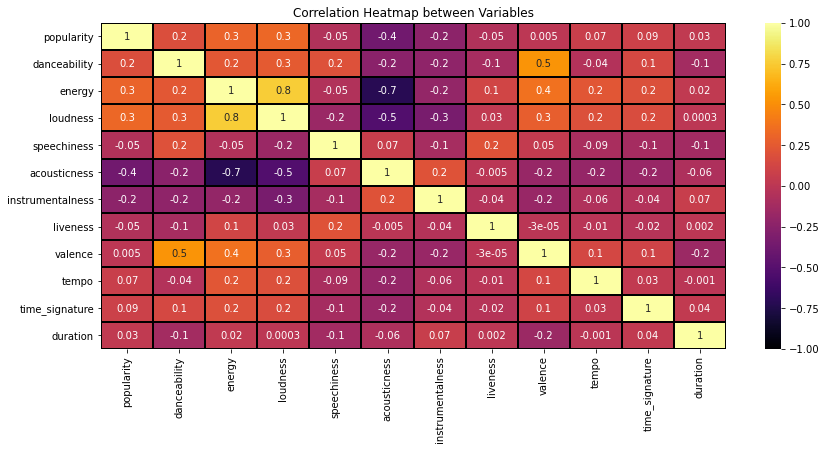

In [17]:
corr_df = df_tracks.drop(['key', 'mode', 'explicit'], axis = 1).corr(method = 'pearson')
plt.figure(figsize = (14,6))
heatmap = sns.heatmap(corr_df, annot = True, fmt = '.1g', vmin = -1, vmax = 1, center = 0, cmap = 'inferno', 
          linewidths = 1, linecolor = 'Black')
heatmap.set_title('Correlation Heatmap between Variables')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 90)
ticks = heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 90)

The scale for this correlation map ranges from -1 to 1. Values between -1 and 0 denote variables that have a negative correlation (least correlated). Values between 0 and 1 denote variables that have a positive correlation (most correlated).

r > 0 implies positive correlation<br>
r < 0 implies negative correlation<br>
r = 0 implies no correlation

__The Spotify Tracks dataset is very large (586672 rows), so we will sample a small percentage of the entire dataset (0.4%) for future calculations and visualizations.__

In [18]:
print(len(df_tracks))

586672


In [19]:
sample = df_tracks.sample(int(0.004 * len(df_tracks)))
print(len(sample))

2346


__Linear Regression Plot - Correlation between Loudness and Energy__

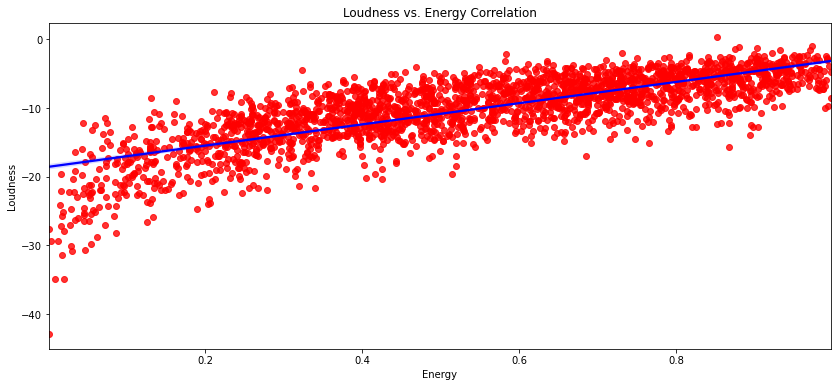

In [20]:
plt.figure(figsize = (14,6))
sns.regplot(data = sample, y = 'loudness', x = 'energy', scatter_kws = {'color':'red'}, 
            line_kws = {'color':'blue'}).set(title = 'Loudness vs. Energy Correlation', xlabel = 'Energy', 
            ylabel = 'Loudness');

This regression plot visualizes the positive correlation between the "loudness" and "energy" variables (r = 0.8).

__Linear Regression Plot - Correlation between Acousticness and Energy__

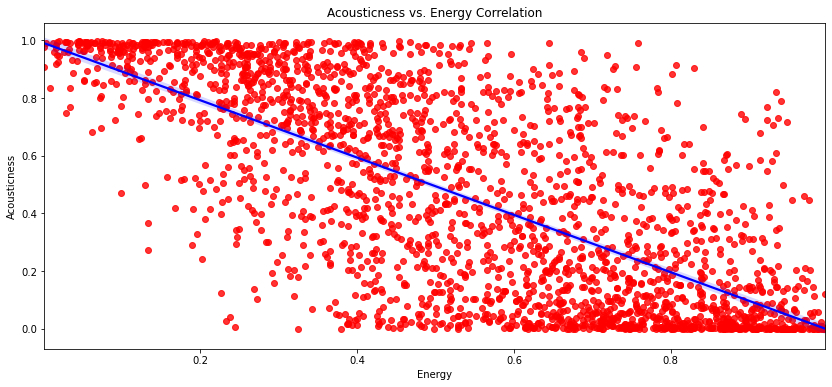

In [21]:
plt.figure(figsize = (14,6))
sns.regplot(data = sample, y = 'acousticness', x = 'energy', scatter_kws = {'color':'red'}, 
            line_kws = {'color':'blue'}).set(title = 'Acousticness vs. Energy Correlation', xlabel = 'Energy', 
            ylabel = 'Acousticness');

This regression plot visualizes the negative correlation between the "acousticness" and "energy" variables (r = -0.7).

__Linear Regression Plot - Correlation between Instrumentalness and Liveness__

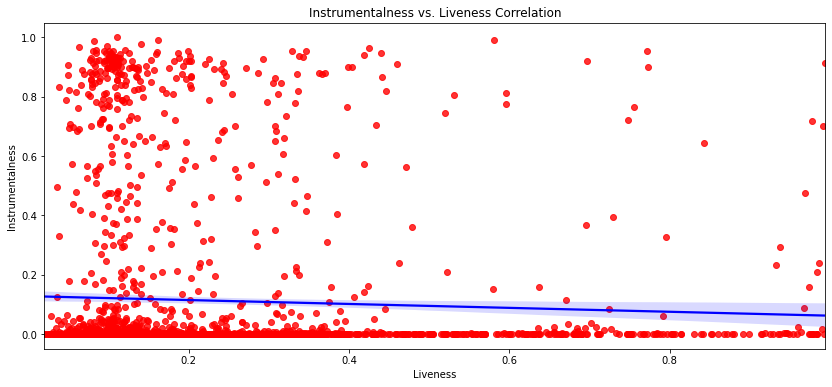

In [22]:
plt.figure(figsize = (14,6))
sns.regplot(data = sample, y = 'instrumentalness', x = 'liveness', scatter_kws = {'color':'red'}, 
            line_kws = {'color':'blue'}).set(title = 'Instrumentalness vs. Liveness Correlation', xlabel = 'Liveness',
            ylabel = 'Instrumentalness');

This regression plot visualizes the lack of correlation between the "instrumentalness" and "liveness" variables (r = -0.04).

__Extract the "year" value from each song's release date and store these "year" values in a new variable.__

In [23]:
df_tracks['date'] = df_tracks.index.get_level_values('release_date')
df_tracks.date = pd.to_datetime(df_tracks.date)
df_tracks['year'] = df_tracks.date.dt.year
df_tracks.head()

,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,date,year
release_date,,,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,...,0.4510,0.674,0.7440,0.151,0.127,104.851,3,127,1922-02-22,1922
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,...,0.9570,0.797,0.0000,0.148,0.655,102.009,1,98,1922-06-01,1922
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,...,0.0512,0.994,0.0218,0.212,0.457,130.418,5,182,1922-03-21,1922
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,...,0.0504,0.995,0.9180,0.104,0.397,169.980,3,177,1922-03-21,1922
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,...,0.0390,0.989,0.1300,0.311,0.196,103.220,4,163,1922-01-01,1922


__Distribution Plot - Visualize the Total Number of Songs on Spotify by Year__

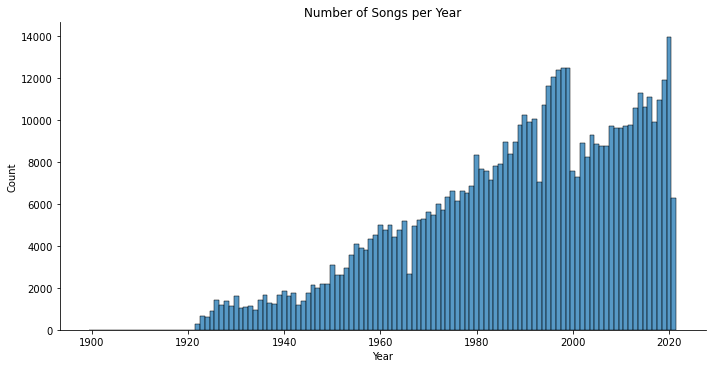

In [24]:
dist_plot = sns.displot(data = df_tracks, x = 'year', discrete = True, aspect = 2, height = 5, kind = 'hist')
dist_plot.set(title = 'Number of Songs per Year');
dist_plot.set_axis_labels('Year', 'Count');

In [25]:
song_count = df_tracks['year'].value_counts()
song_count

2020    13937
1998    12485
1999    12484
1997    12349
1996    12058
        ...  
1925      903
1923      657
1924      633
1922      294
1900        1
Name: year, Length: 101, dtype: int64

It can be visualized through the distribution plot, and confirmed by the song count above that the year 1900 only has one song in the dataset, and can be viewed as an outlier. For the next part of the analysis, we will be working with the means of the variables in the dataset. This single song would skew our results when analyzing years prior to 1922, therefore we will remove this song and its values.

__Remove Outlier__

In [26]:
df_tracks = df_tracks.drop(df_tracks[df_tracks.year == 1900].index)
df_tracks.sort_values('year', ascending = True).head()

,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,date,year
release_date,,,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.445,0,-13.338,...,0.4510,0.674,0.744000,0.1510,0.127,104.851,3,127,1922-02-22,1922
1922-01-01,3AwlEhAkDDwKuTaNlgmMNQ,Nola,0,0,"['Vincent Lopez and his Orchestra', 'Vincent L...","['1NElogFmaZxxGVsKS6hvl2', '3wxzXhMAoYbpJDXtBx...",0.567,0.663,2,-5.334,...,0.0318,0.992,0.878000,0.2680,0.853,103.394,4,233,1922-01-01,1922
1922-01-01,32Y9PU9JqxYFqzFaIdCQOs,Midnight rose,0,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",0.483,0.060,1,-9.499,...,0.0420,0.982,0.000089,0.0498,0.381,136.044,4,196,1922-01-01,1922
1922-01-01,2zRV6Vk6ZQYDokmiv5QEoP,California blues,0,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",0.578,0.462,8,-7.217,...,0.0398,0.995,0.903000,0.0767,0.513,89.876,4,195,1922-01-01,1922
1922-01-01,2uqaxtC6Usy7QeKfoD1jhB,Good evenin',0,0,"['Isham Jones & His Orchestra', 'Isham Jones']","['65A1WinXDUhVkZD98s8kKU', '4OWTlYl5kkhaZEsyjU...",0.565,0.334,10,-6.802,...,0.0309,0.978,0.032900,0.2560,0.550,97.167,4,190,1922-01-01,1922


In [27]:
print(len(df_tracks))

586671


The row of the outlier song from 1900 has been removed from the dataset.

__Create a new dataframe with the mean of each column grouped by year.__

In [28]:
mean_df = df_tracks.groupby(['year']).mean()
mean_df

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
year,,,,,,,,,,,,,,,
1922,0.054422,0.000000,0.533320,0.324054,4.850340,-13.953241,0.738095,0.246295,0.898857,0.324971,0.250670,0.563605,109.120405,3.700680,166.632653
1923,1.575342,0.001522,0.637332,0.266977,3.651446,-16.351921,0.797565,0.552072,0.859965,0.157659,0.225396,0.671967,109.552648,3.662100,156.971081
1924,0.612954,0.001580,0.593344,0.356725,4.723539,-13.290367,0.693523,0.375208,0.866266,0.339628,0.203447,0.554935,119.457894,3.753555,189.105845
1925,1.414175,0.000000,0.617391,0.263749,5.069767,-14.977595,0.764120,0.305693,0.912170,0.275384,0.255157,0.635196,113.901050,3.760797,189.374308
1926,1.938776,0.000000,0.622113,0.263075,5.746657,-15.929906,0.705841,0.356952,0.785739,0.323416,0.211447,0.539702,113.386792,3.813512,165.959887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,42.236222,0.170998,0.624972,0.659730,5.378805,-7.215648,0.583274,0.100517,0.278547,0.089228,0.200736,0.493965,121.335623,3.934473,229.757205
2018,42.139539,0.189923,0.634510,0.652202,5.371617,-7.390117,0.566843,0.108212,0.278446,0.098398,0.198216,0.483251,121.684055,3.941020,220.774049
2019,44.920551,0.214916,0.649724,0.637066,5.369615,-7.434020,0.567565,0.111168,0.293902,0.081428,0.189971,0.494212,122.023748,3.943563,216.808600


__Has music become more explicit over time?__

The "explicit" variable is binary, showing a "1" for songs that contain explicit content, and a "0" for songs that do not contain explicit content.

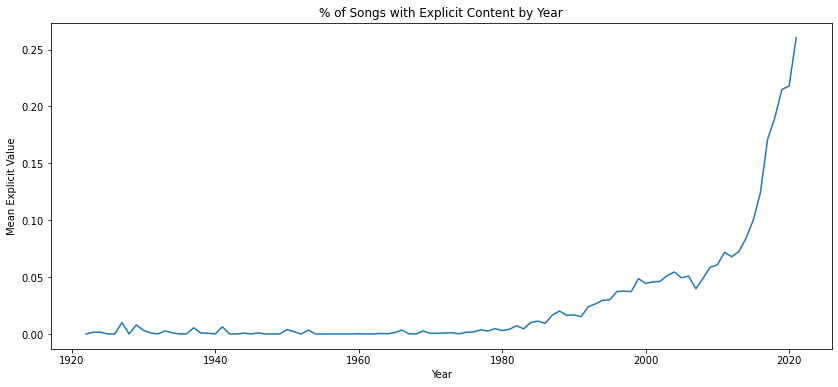

In [29]:
explicit_trend = mean_df['explicit'].plot.line(figsize = (14,6))
explicit_trend.set_xlabel('Year');
explicit_trend.set_ylabel('Mean Explicit Value');
explicit_trend.set_title('% of Songs with Explicit Content by Year');

This line chart shows that music is much more explicit today, and there was a large increase in explicit content from 1990 to 2020.

__Has music become louder over time?__

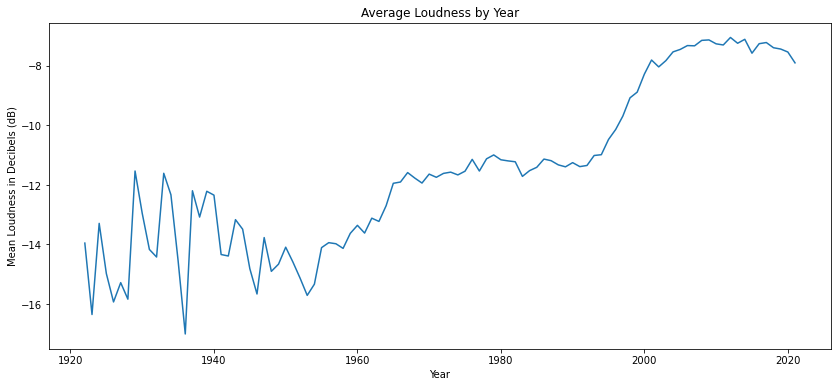

In [30]:
loudness_trend = mean_df['loudness'].plot.line(figsize = (14,6))
loudness_trend.set_xlabel('Year');
loudness_trend.set_ylabel('Mean Loudness in Decibels (dB)');
loudness_trend.set_title('Average Loudness by Year');

According to the line chart, there is a clear trend that the average loudness of songs has increased dramatically since the 1980's.

__How long do songs last on average per year?__

__Line Graph - Visualize the Change in Average Duration of Songs per Year__

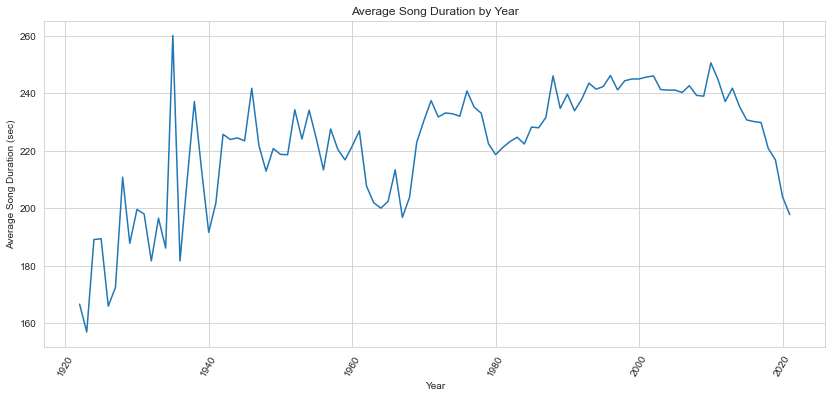

In [31]:
avg_dur = mean_df.duration
sns.set_style(style = 'whitegrid')
plot_dims = (14,6)
plot, ax = plt.subplots(figsize = plot_dims)
plot = sns.lineplot(x = mean_df.index, y = avg_dur, ax = ax).set(title = 'Average Song Duration by Year', 
                    xlabel = 'Year', ylabel = 'Average Song Duration (sec)')
plt.xticks(rotation = 60)
ticks = plt.xticks(rotation = 60)

__Bar Graph - Visualize the Change in Average Duration of Songs per Year__

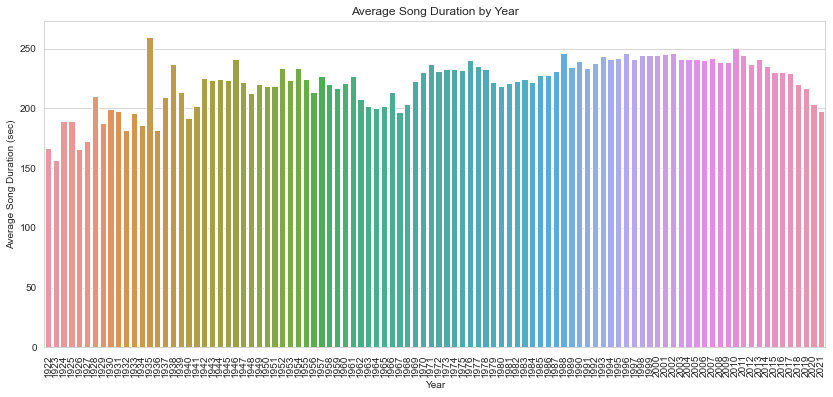

In [32]:
sns.set_style(style = 'whitegrid')
bar_dims = (14,6)
bar, ax = plt.subplots(figsize = bar_dims)
bar = sns.barplot(x = mean_df.index, y = avg_dur, ax = ax).set(title = 'Average Song Duration by Year', 
                  xlabel = 'Year', ylabel = 'Average Song Duration (sec)')
plt.xticks(rotation = 90)
ticks = plt.xticks(rotation = 90)

Both of these visualizations show that on average, songs from the 1920's to the 1960's were shorter. However, their average duration was increasing. From the 1970's to the 2000's, there was a gradual increase in average song duration. Finally, from 2010 and on, the average song duration began to see a decline. 

# Spotify Genres Dataset Analysis

__Preview the Dataset__

In [33]:
df_genres.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


__Check for any null values present in the dataset.__

In [34]:
pd.isnull(df_genres).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [35]:
pd.isnull(df_genres).sum().sum()

0

In [36]:
len(df_genres)

232725

There are no missing values in the entire dataset consisting of ~232k rows. Therefore the dataset is good, and our conclusions will be valid.

__Inspect and identify the number of rows and columns in the dataset, and check the data type for each variable.__

In [37]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

__Descriptive statistics for numerical values in the dataset.__

In [38]:
df_genres.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


__Inspect and explore the dataset.__

Let's look at all of the unique genres in the dataset.

In [39]:
dif_genres = df_genres.genre.unique()
len(dif_genres)

27

In [40]:
print(dif_genres)

['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music"
 'Children’s Music' 'Rap' 'Indie' 'Classical' 'Pop' 'Reggae' 'Reggaeton'
 'Jazz' 'Rock' 'Ska' 'Comedy' 'Soul' 'Soundtrack' 'World']


Here we see that there are 27 genres in the dataset, however there is an error because "Children's Music" is listed twice as two separate genres when it should be one genre. This was a simple error made when constructing the datset, one of the "Children's Music" genres uses an apostrophe while the other uses a single comma quotation mark.

__Clean the dataset for future visualizations.__

We can use Unicode to look for these specific characters in the genre names, and adjust them accordingly.

In [41]:
print('Single comma quotation mark = ' + '\u2019')

Single comma quotation mark = ’


In [42]:
print('Apostrophe = ' + '\u0027')

Apostrophe = '


Rows in dataframe where genre = Children's Music (containing a single comma quotation mark)

In [43]:
child_genre_1 = df_genres[(df_genres['genre'] == "Children" + "\u2019" + "s " + "Music")]
child_genre_1.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
77052,Children’s Music,Joji,SLOW DANCING IN THE DARK,0rKtyWc8bvkriBthvHKY8d,84,0.5440,0.515,209274,0.479,0.005980,D#,0.1910,-7.458,Major,0.0261,88.964,4/4,0.284
77053,Children’s Music,YUNGBLUD,11 Minutes (with Halsey feat. Travis Barker),4mGdjNMo0RonTlOEb7cYg4,86,0.0116,0.464,239507,0.852,0.000000,B,0.1080,-3.804,Major,0.0670,160.075,4/4,0.233
77054,Children’s Music,H.E.R.,Best Part (feat. Daniel Caesar),4OBZT9EnhYIV17t4pGw7ig,84,0.7950,0.473,209400,0.371,0.000000,E,0.1090,-10.219,Minor,0.0405,75.208,4/4,0.413
77055,Children’s Music,Joji,YEAH RIGHT,1VGzxJnVQND7Cg5H5wGj14,81,0.6190,0.672,174358,0.588,0.241000,C#,0.0992,-9.573,Major,0.1330,169.033,4/4,0.204
77056,Children’s Music,H.E.R.,Could've Been (feat. Bryson Tiller),6lzLjIOyWTyTJvk0jraYee,79,0.6400,0.545,248467,0.330,0.000007,C#,0.2200,-11.719,Minor,0.1640,103.553,4/4,0.399


In [44]:
print(len(child_genre_1))

9353


Rows in dataframe where genre = Children's Music (containing an apostrophe)

In [45]:
child_genre_2 = df_genres[(df_genres['genre'] == "Children" + "\u0027" + "s " + "Music")]
child_genre_2.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
71649,Children's Music,Toddler Tunes,Itsy Bitsy Spider,749a3IktgztaKcRg3zmQvv,47,0.302,0.901,137454,0.526,0.000000,C#,0.0540,-7.296,Minor,0.0362,109.946,4/4,0.706
71650,Children's Music,Spongebob Squarepants,The Best Day Ever,3L3dVggx061Wx5y4d2L0mQ,47,0.202,0.565,182173,0.758,0.000000,B,0.0552,-5.205,Major,0.0294,127.817,4/4,0.605
71651,Children's Music,Blippi,The Excavator Song,3X6fJLY0KvjLQSDHTLwvDn,46,0.528,0.737,175187,0.549,0.000087,A,0.2990,-13.215,Major,0.0382,124.980,4/4,0.840
71652,Children's Music,Pinkfong,Baby Shark Music Box,07enmUOMmpuy7ZVUXHAPIk,44,0.688,0.686,110523,0.121,0.885000,G,0.0793,-20.751,Major,0.1030,148.002,4/4,0.818
71653,Children's Music,Toddler Tunes,"Head, Shoulders, Knees and Toes",4izXmYE9U6clkv5uAyVEN7,47,0.249,0.867,83291,0.729,0.000000,C#,0.0802,-6.616,Major,0.0373,120.129,4/4,0.793


In [46]:
print(len(child_genre_2))

5403


__Option 1: Incorrect__

We could combine the rows associated with child_genre_1 and child_genre_2 to make one "Children's Music" category in the genre column.

In [47]:
new_df_genres = pd.read_csv('/Users/mattabruzzeseott/Documents/Portfolio Projects/Jupyter/SpotifyFeatures.csv')
new_df_genres['genre'] = np.where(new_df_genres['genre'] == "Children" + "\u2019" + "s " + "Music", "Children" + 
                                  "\u0027" + "s " + "Music", df_genres['genre'])
print(new_df_genres.genre.unique())
new_unique_genre = new_df_genres.groupby(['genre'])
len(new_unique_genre)

['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music" 'Rap' 'Indie'
 'Classical' 'Pop' 'Reggae' 'Reggaeton' 'Jazz' 'Rock' 'Ska' 'Comedy'
 'Soul' 'Soundtrack' 'World']


26

Number of rows in "new_df_genres" dataframe.

In [48]:
len(new_df_genres)

232725

In [49]:
new_df_genres.groupby(['genre']).count()

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
genre,,,,,,,,,,,,,,,,,
A Capella,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119
Alternative,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263
Anime,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936
Blues,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023
Children's Music,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756
Classical,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256
Comedy,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681
Country,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664
Dance,8701,8701,8701,8701,8701,8701,8701,8701,8701,8701,8701,8701,8701,8701,8701,8701,8701


In theory this is a viable solution. 

__Option 2: Correct__

However, upon further inspection of the dataset, it can be observed that the rows contained in the "child_genre_1" dataframe are miscategorized. Therefore, the data is incorrect and should be removed from the original Genres dataset for proper analysis moving forward.

In [50]:
df_genres = df_genres.drop(df_genres[df_genres.genre == "Children" + "\u2019" + "s " + "Music"].index)
df_genres

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [51]:
print(df_genres.genre.unique())
len(df_genres.groupby(['genre']))

['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music" 'Rap' 'Indie'
 'Classical' 'Pop' 'Reggae' 'Reggaeton' 'Jazz' 'Rock' 'Ska' 'Comedy'
 'Soul' 'Soundtrack' 'World']


26

Number of rows in updated "df_genres" dataframe.

In [52]:
len(df_genres)

223372

In [53]:
df_genres.groupby(['genre']).count()

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
genre,,,,,,,,,,,,,,,,,
A Capella,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119
Alternative,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263
Anime,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936
Blues,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023
Children's Music,5403,5403,5403,5403,5403,5403,5403,5403,5403,5403,5403,5403,5403,5403,5403,5403,5403
Classical,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256
Comedy,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681
Country,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664
Dance,8701,8701,8701,8701,8701,8701,8701,8701,8701,8701,8701,8701,8701,8701,8701,8701,8701


Now that our dataset has been cleaned and the rows with miscategorized data have been removed (~9k), we can move forward with our visualizations.

# Data Visualizations

__Analyze song duration with respect to genre.__

First we need to convert the song duration column in the Genres dataframe from Milliseconds to Seconds.

In [54]:
df_genres['duration'] = df_genres['duration_ms'].apply(lambda x: round(x/1000))
df_genres.drop('duration_ms', inplace = True, axis = 1)
df_genres.duration.head()

0     99
1    137
2    170
3    152
4     83
Name: duration, dtype: int64

In [55]:
df_genres.groupby(['genre']).duration.mean()

genre
A Capella           204.529412
Alternative         233.241283
Anime               229.931625
Blues               251.934501
Children's Music    142.728114
Classical           310.337619
Comedy              235.307923
Country             217.230379
Dance               226.263878
Electronic          269.198358
Folk                235.803420
Hip-Hop             219.981495
Indie               224.150791
Jazz                265.642729
Movie               210.407891
Opera               259.160386
Pop                 220.859685
R&B                 225.746330
Rap                 219.858752
Reggae              239.498575
Reggaeton           232.034390
Rock                237.000108
Ska                 191.547780
Soul                234.719441
Soundtrack          192.609475
World               315.322779
Name: duration, dtype: float64

__Bar Graph - Visualize the Average Song Duration With Respect to Genre__

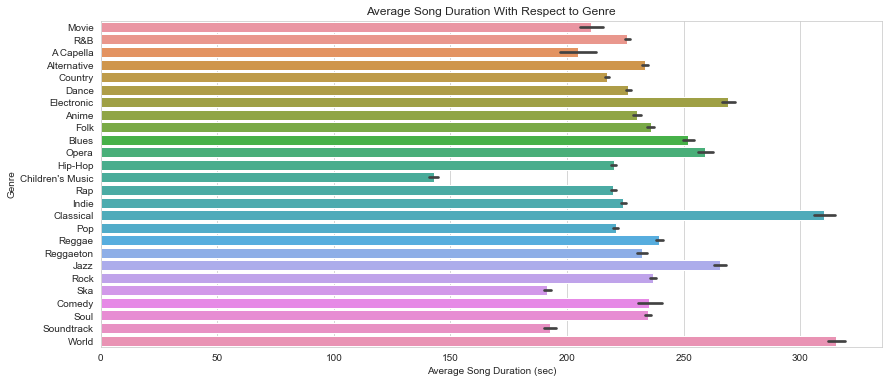

In [56]:
sns.set_style(style = 'whitegrid')
song_bar_dims = (14,6)
song_bar, ax = plt.subplots(figsize = song_bar_dims)
sns.color_palette('rocket', as_cmap = True)
song_bar = sns.barplot(data = df_genres, x = 'duration', y = 'genre', ax = ax).set(title = 
                       'Average Song Duration With Respect to Genre', xlabel = 'Average Song Duration (sec)', 
                       ylabel = 'Genre')

The bar graph above visualizes the average song duration per genre. Each bar in the graph displays the mean song duration according to genre as confirmed by the dataframe above. The Seaborn barplot function uses the mean as the default estimator for each bin in the graph.

This visualization shows that the "World" and "Classical" genres have the longest songs on average, while the "Children's Music" genre has the shortest songs on average by a significant amount. 

__Are shorter songs more popular than longer songs?__

First we must sort the songs in the dataset into different bins based on their respective durations; Short (<2 min), Medium (2-4 min), Long (4-6 min), and Very Long (>6 min).

In [57]:
pd.options.mode.chained_assignment = None
song_length = df_genres[['popularity', 'duration']]
bin_names = ['Short', 'Medium', 'Long', 'Very Long']
bin_numbers = [0, 119, 239, 359, 999999999]
song_length['length'] = pd.cut(song_length['duration'], bins = bin_numbers, labels = bin_names)

__Bar Graph - Visualize the Average Song Popularity With Respect to Length__

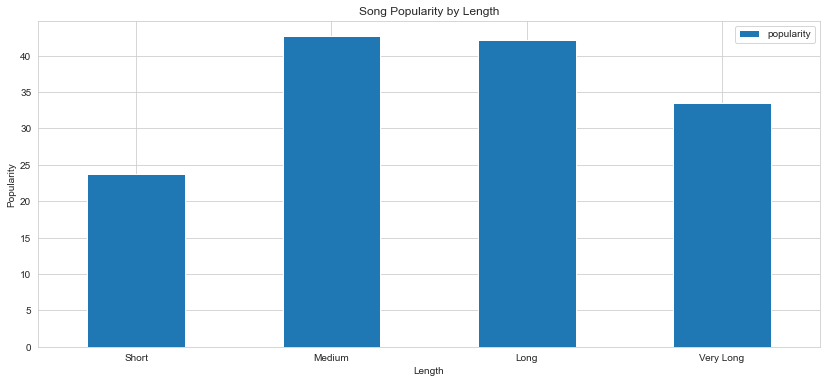

In [58]:
length_graph = song_length[['popularity', 'length']].groupby('length').mean().plot.bar(figsize = (14,6))
length_graph.set_xlabel('Length');
length_graph.set_ylabel('Popularity');
length_graph.set_title('Song Popularity by Length');
plt.xticks(rotation = 0);

This analysis shows that songs between two and six minutes long are noticebly more popular than songs that are shorter than two minutes and longer than six minutes.

__Determine the top 5 genres by popularity.__

First we need to determine the average popularity per genre in the dataset through grouping and sorting.

In [59]:
pop = df_genres[['genre', 'popularity']].copy()
most_pop = pop.groupby(['genre']).popularity.mean()
most_pop_sort = most_pop.sort_values(ascending = False).head()
most_pop_sort

genre
Pop        66.590667
Rap        60.533795
Rock       59.619392
Hip-Hop    58.423131
Dance      57.275256
Name: popularity, dtype: float64

Create a new dataframe to use for our bar graph from the resulting series above.

In [60]:
index_names = ['first', 'second', 'third', 'fourth', 'fifth']
column_1 = ['Pop', 'Rap', 'Rock', 'Hip-Hop', 'Dance']
column_2 = [66.590667, 60.533795, 59.619392, 58.423131, 57.275256]
column_names = ['genre', 'mean_popularity']
most_pop_df = pd.DataFrame(list(zip(column_1, column_2)), columns = column_names, index = index_names)
most_pop_df

,genre,mean_popularity
first,Pop,66.590667
second,Rap,60.533795
third,Rock,59.619392
fourth,Hip-Hop,58.423131
fifth,Dance,57.275256


__Bar Graph - Visualize the Top 5 Most Popular Genres__

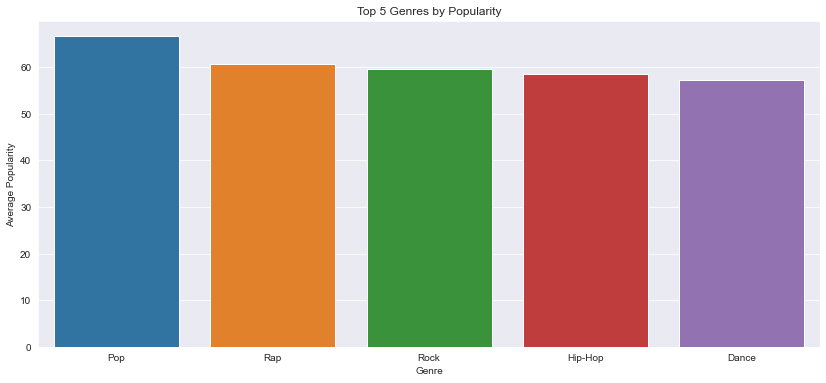

In [61]:
sns.set_style(style = 'darkgrid')
plt.figure(figsize = (14,6))
sns.barplot(data = most_pop_df, x = 'genre', y = 'mean_popularity').set(title = 'Top 5 Genres by Popularity', 
            xlabel = 'Genre', ylabel = 'Average Popularity');

This bar graph clearly visualizes the top 5 genres and their respective popularity ratings.

__Determine the percentage of each genre in the dataset.__

Create a new dataframe for the different genres and their respective song counts in the dataset.

In [62]:
pie_genres = pd.DataFrame(df_genres['genre'].value_counts()).reset_index()
pie_genres.rename(columns = {'index':'genres', 'genre':'total_count'}, inplace = True)
pie_genres

,genres,total_count
0,Comedy,9681
1,Soundtrack,9646
2,Indie,9543
3,Jazz,9441
4,Pop,9386
5,Electronic,9377
6,Folk,9299
7,Hip-Hop,9295
8,Rock,9272
9,Alternative,9263


__Pie Chart - Visual Representation of Each Genre by Percentage__

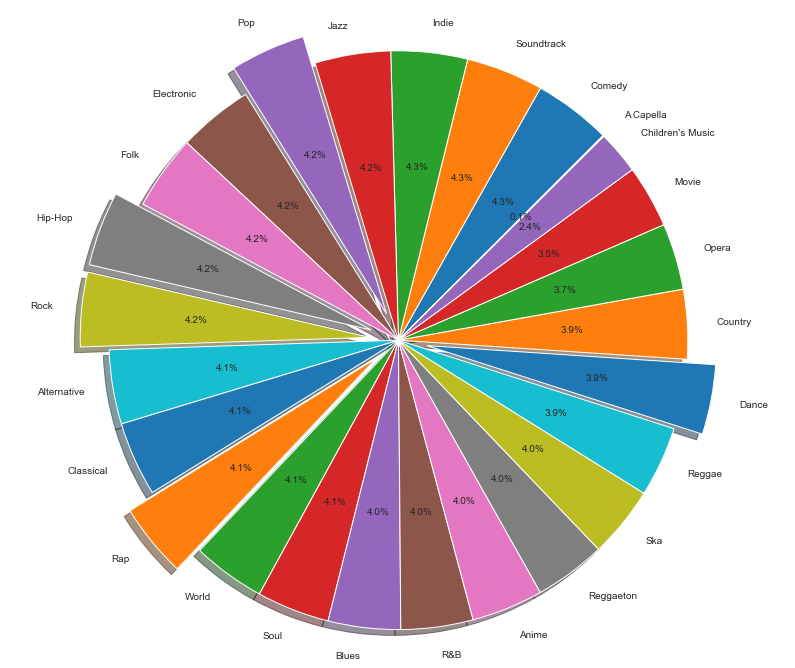

In [63]:
labels = pie_genres.genres
sizes = pie_genres.total_count
explode = [0,0,0,0,0.1,0,0,0.1,0.1,0,0,0.1,0,0,0,0,0,0,0,0,0.1,0,0,0,0,0]
fig = plt.figure(figsize = (14,12))
ax = fig.subplots()
ax.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%', shadow = True, startangle = 45)
ax.axis('equal');

This pie chart visualizes the percentages of each genre in the dataset. From the pie chart it can be easily observed that each of the genres except "A Capella" and "Children's Music" make up ~4% of the dataset. Therefore, there is a fairly even representation of all of the genres within the entire dataset. The three genres with the most songs are "Indie," "Soundtrack," and "Comedy" with 4.3% of the dataset. The genre with the least songs is "A Capella" with 0.1% of the dataset. The pie chart also has the slices of the top 5 most popular genres exploded for easy visualization.

__Determine the top 15 most popular artists.__

Create a new dataframe that ranks the top 15 artists in the dataset by their respective popularities.

In [64]:
artist_pop = df_genres.groupby('artist_name').sum().sort_values('popularity', ascending = False)[:15]
artist_pop = artist_pop.reset_index()
artist_pop

,artist_name,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration
0,Drake,31703,93.260066,316.0960,266.82000,3.099511,99.6669,-3856.222,113.3354,57529.231,171.6347,116148
1,Chris Brown,22047,41.894164,251.4070,238.32800,0.021477,58.4486,-2481.568,44.4065,45572.893,188.2914,89375
2,Nobuo Uematsu,19710,525.223346,338.5755,279.79289,601.255151,139.4140,-12039.046,37.1339,98771.076,268.9002,166362
3,Future,19590,39.376227,240.8530,179.97300,3.487802,61.3051,-2254.880,69.0511,42430.948,114.0344,66701
4,Hans Zimmer,19439,329.527433,147.1366,141.18172,437.113536,90.8699,-10669.538,25.2366,58485.140,59.4124,133739
5,Eminem,18876,38.632000,217.5780,228.33300,0.269124,78.2914,-1359.224,80.0316,34010.032,157.2370,81120
6,Giuseppe Verdi,18580,1330.979000,425.7761,221.33948,169.783522,362.7316,-28175.900,96.1431,140096.253,256.1542,344129
7,Wolfgang Amadeus Mozart,17785,769.482000,257.6289,96.05924,439.144784,161.7496,-17812.061,46.1827,86223.997,214.4025,271882
8,Howard Shore,17283,362.502090,70.1809,79.16198,404.511136,66.9259,-9910.852,19.9603,45231.992,29.5684,122290
9,Johann Sebastian Bach,16508,599.294000,206.5148,73.26695,378.931669,96.1632,-14934.723,31.6374,65928.364,250.8826,140056


__Bar Graph - Visualize the Top 15 Artists by Popularity__

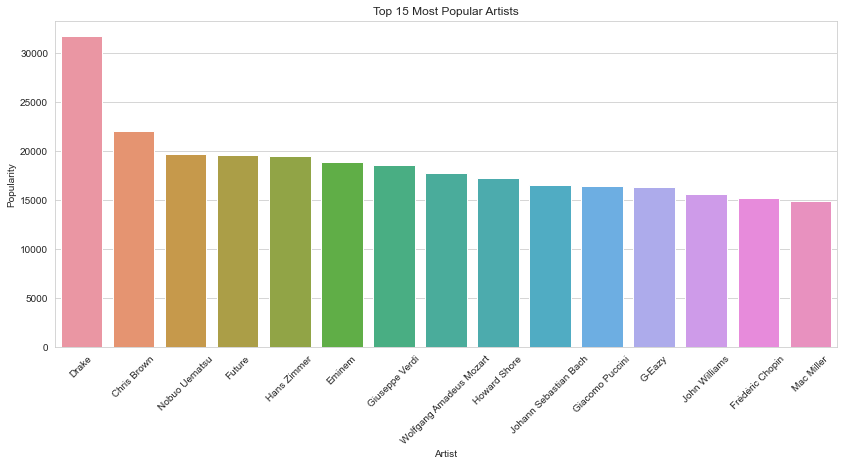

In [65]:
sns.set_style(style = 'whitegrid')
plt.figure(figsize = (14,6))
sns.barplot(data = artist_pop, x = 'artist_name', y = 'popularity').set(title = 'Top 15 Most Popular Artists', 
            xlabel = 'Artist', ylabel = 'Popularity');
plt.xticks(rotation = 45);

The bar graph clearly visualizes the data from the "artist_pop" dataframe above. According to the visualization, Drake is clearly the most popular artist in the entire dataset, followed by Chris Brown, Nobuo Uematsu, Future, etc.

# Conclusion

Through the use of Python and its various libraries and functions, one can analyze extensive data and draw useful insights from it. This Spotify EDA project allowed us to analyze large music datasets, create interesting visualizations, find correlations within the data, and extract useful insights.